In [1]:
import pandas as pd
import numpy as np

In [2]:
gass_GWPs=pd.read_excel('../data/IPCC_AR4-AR6_GWPs.xlsx',sheet_name='Main')

In [3]:
grid_gasses=pd.read_excel('../data/egrid2022_summary_tables.xlsx',sheet_name='Table 1',skiprows=[0,1,2])

In [4]:
grid_resources=pd.read_excel('../data/egrid2022_summary_tables.xlsx',sheet_name='Table 2',skiprows=[0,1])

In [5]:
my_grid_resources=grid_resources.loc[grid_resources['Unnamed: 1']=='RMPA']
resource_fraction=dict()
others=0
for i,k in enumerate(my_grid_resources):
    if i<5:
        continue
    fraction=my_grid_resources[k].values[0]
    if fraction<0.05:
        others+=fraction
        continue
    resource_fraction[k]=fraction
resource_fraction['others']=others

In [6]:
resource_fraction

{'Coal': 0.366,
 'Gas': 0.236,
 'Hydro': 0.084,
 'Wind': 0.275,
 'others': 0.038000000000000006}

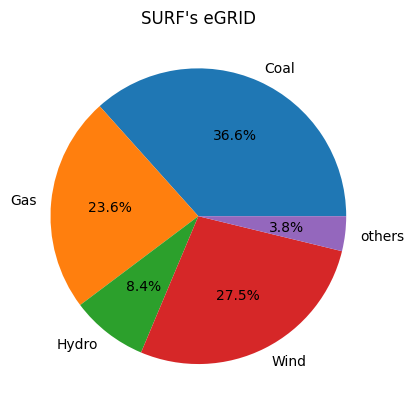

In [7]:
import matplotlib.pyplot as plt
plt.title("SURF's eGRID")
plt.pie(resource_fraction.values(), labels=resource_fraction.keys(), autopct='%1.1f%%')
plt.show()

In [8]:
lbsPMWh_to_kgPkWh=0.453592*1e-3
total_gass_kg_kwh=dict()
SURF_grid='RMPA'
my_grid_gasses=grid_gasses.loc[grid_gasses['Unnamed: 1']==SURF_grid]
for i,k in enumerate(my_grid_gasses):
    if i<3:
        continue
    if '.1' in k:
        continue
    if 'Unnamed' in k:
        continue
    total_gass_kg_kwh[k]=my_grid_gasses[k].values[0]*lbsPMWh_to_kgPkWh

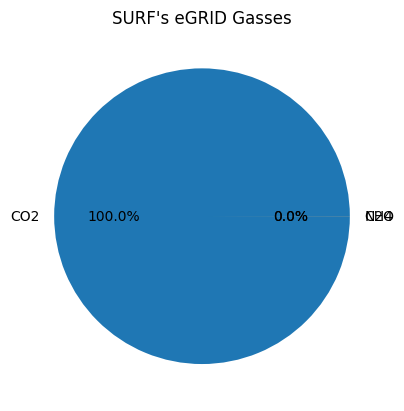

In [9]:
plt.title("SURF's eGRID Gasses")
fracs={
    'CO2':total_gass_kg_kwh['CO2'],
    'CH4':total_gass_kg_kwh['CH4'],
    'N2O':total_gass_kg_kwh['N2O'],
}
plt.pie(fracs.values(), labels=fracs.keys(), autopct='%1.1f%%')
plt.show()

In [10]:
gass_keys={'CO2':'Carbon dioxide','CH4':'Methane','N2O':'Nitrous oxide',}
gass_gwp=dict()
for gass,name in gass_keys.items():
    gass_values=gass_GWPs.loc[gass_GWPs['GHG']==name]
    report=gass_values['Indicator'].values
    GWPs=gass_values['GWP kgCO2e/kg GHG'].values
    gass_gwp[gass]=dict()
    for i,key in enumerate(report):
        gass_gwp[gass][key]=GWPs[i]

In [11]:
def emission_CO2e(report):
    """
    report: str 'AR4-100','AR4-20','AR4-500','AR5-100','AR5-20','AR6-100','AR6-20','AR6-500'
    returns: Emissions in CO2e/kg
    """
    fractionals=dict()
    emissions=0
    for k,GWPs in gass_gwp.items():
        emissions+=total_gass_kg_kwh[k]*GWPs[report]
    for k,GWPs in gass_gwp.items():
        fractionals[k]=total_gass_kg_kwh[k]*GWPs[report]/emissions
    return emissions,fractionals

In [12]:
emission_CO2e('AR6-20')

(0.5156933714383999,
 {'CO2': 0.9894246704796915,
  'CH4': 0.007213586438049375,
  'N2O': 0.0033617430822592683})

In [13]:
 total_gass_kg_kwh['CO2e']

0.513345034936

In [14]:
gass_gwp['CH4']

{'AR4-100': 25.0,
 'AR4-20': 72.0,
 'AR4-500': 7.6,
 'AR5-100': 28.0,
 'AR5-20': 84.0,
 'AR6-100': 27.9,
 'AR6-20': 81.2,
 'AR6-500': 7.95}